In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from colorama import init, Fore, Back, Style
import time
%matplotlib inline

In [68]:
init()

In [69]:
def timed(function):
    def wrapper(*args,**kwargs):
        before = time.time()
        value = function(*args, **kwargs)
        after = time.time()
        print(f'{after-before:.3f}')
        return value
    return wrapper

# Importando Dados

In [70]:
import csv

afrodev = open('./assets/contents/formulario_fofoqueiro.csv')

csvreader = csv.reader(afrodev, delimiter=';')
header = []
header = np.asarray(next(csvreader))
{i: val for i,val in enumerate(header)}

{0: 'User_id',
 1: 'Carimbo de data/hora',
 2: 'GÃªnero ',
 3: 'Idade',
 4: 'CEP',
 5: 'GÃ\xadria da sua cidade',
 6: 'Estilo de mÃºsica favorita',
 7: 'Cor favorita ',
 8: 'NÃºmero de irmÃ£os ',
 9: 'Qual seu salÃ¡rio dos sonhos ? ',
 10: 'Gosta de programaÃ§Ã£o',
 11: 'Gosta de matemÃ¡tica',
 12: 'Qual sua sÃ©rie favorita?',
 13: 'VocÃª gosta do seu nome?',
 14: 'VocÃª acredita em ET?',
 15: 'Uma data importante',
 16: 'Qual joia do infinito dos vingadores vocÃªs gostaria de possuir ?',
 17: 'O quÃ£o atraente vocÃª se considera de 0 atÃ© 10',
 18: 'O quanto vocÃª gosta de cafÃ©?',
 19: 'VocÃª prefere gato ou cachorro?'}

In [71]:
rows = [row for row in csvreader]
alunos_afrodev = np.array(rows)
afrodev.close()

# Perguntas iniciais

In [72]:
alunos_afrodev.shape

(32, 20)

In [73]:
alunos_afrodev.ndim

2

In [74]:
alunos_afrodev

array([['1', '04/10/2021 20:05:11', 'Masculino', '31', '90660170',
        'Porto Alegre', 'Rock', 'Azul Marinho', '0', 'R$Â\xa05.000,00',
        'Sim', 'Sim', 'Naruto Shippuden', 'Sim', 'NÃ£o', '17/12/2018',
        'JOIA DA ALMA', '8', '10', 'Cachorro'],
       ['2', '04/10/2021 20:05:15', 'Masculino', '26', '44380000',
        'Barril', 'ForrÃ³', 'Azul', '1', '12000', 'Sim', 'Sim', 'Suits',
        'Sim', 'Sim', '05/03/1995', 'JOIA DO TEMPO', '10', '5',
        'Cachorro'],
       ['3', '04/10/2021 20:05:25', 'Feminino', '23', '57061110',
        'MaceiÃ³', 'Rock', 'Verde', '1', '10000', 'Sim', 'Sim',
        'Friends', 'Sim', 'Sim', '16/04/2018', 'JOIA DO TEMPO', '8',
        '10', 'Gato'],
       ['4', '04/10/2021 20:05:32', 'Masculino', '27', '45820-085',
        'Fazer um reg', 'ForrÃ³', 'Azul', '3', '10k', 'Sim', 'Sim',
        'Game of Thrones', 'Sim', 'Sim', '02/08/2017',
        'JOIA DA REALIDADE', '6', '3', 'Gato'],
       ['5', '04/10/2021 20:05:34', 'Masculino', '20', '

# Como fazer um head()

In [75]:
alunos_afrodev[:,0:2][:5]

array([['1', '04/10/2021 20:05:11'],
       ['2', '04/10/2021 20:05:15'],
       ['3', '04/10/2021 20:05:25'],
       ['4', '04/10/2021 20:05:32'],
       ['5', '04/10/2021 20:05:34']], dtype='<U26')

# Refazer com regex

In [76]:
dados_idade = (alunos_afrodev[:,header == 'Idade']).ravel()

In [77]:
idades = (np.array([s.split(' ')[0] 
                    for s in dados_idade]))\
         .astype(np.uint8)

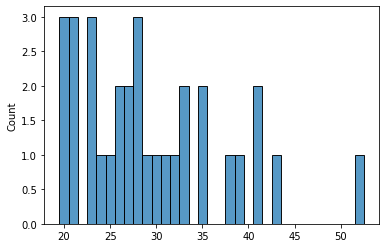

In [78]:
sns.histplot(idades, discrete=True);

In [79]:
idades.mean()

29.46875

# Salário dos sonhos

In [80]:
salario = (alunos_afrodev[:,header == 'Qual seu sal'
                                      +u'Ã¡'
                                      +'rio dos sonhos ? ']).ravel()

In [81]:
def tratamento_dados(elemento: str) -> str:
    resultado = elemento.replace('k+','000')\
                        .replace('mil','000')\
                        .replace(' ','')\
                        .replace('.','')\
                        .replace('k','000')\
                        .replace('mensais','')\
                        .replace('reais','')\
                        .replace('R$Â','')\
                        .replace(u'\xa0','')\
                        .replace(',','.')
    return resultado

In [82]:
salarios = (np.asarray([tratamento_dados(i) 
                        for i in salario])).astype(np.float32)

In [83]:
print(Fore.RED + str(np.max(salarios)))

120000.0


In [84]:
np.min(salarios)

3000.0

In [85]:
np.mean(salarios)

25750.0

# Somatório do salário dos sonhos

In [86]:
np.sum(salarios)

824000.0

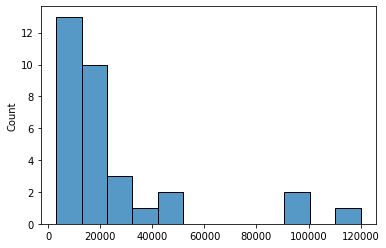

In [87]:
sns.histplot(salarios);

# O quanto você gosta de café?

In [88]:
cafe = alunos_afrodev[:,header == 'O quanto voc'
                                  +u'Ãª'
                                  +' gosta de caf'
                                  +u'Ã©'
                                  +'?'].astype(np.uint8).ravel()

In [89]:
cafe

array([10,  5, 10,  3,  5,  5,  7,  9, 10,  9,  0,  0, 10,  9,  9, 10, 10,
        1,  1, 10,  7, 10, 10,  3,  2,  7, 10, 10,  6,  8,  8,  2],
      dtype=uint8)

# Média do café

In [90]:
np.mean(cafe)

6.75

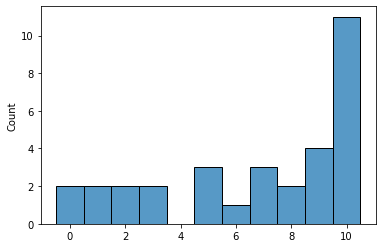

In [91]:
sns.histplot(cafe, discrete=True);

# Sabendo que o salário mínimo é de R$ 1.192,40, e o crescimento anual é de 5%, quantos anos cada pessoa levaria para chegar no salário dos sonhos, levando em consideração a coluna Qual seu salário dos sonhos ?

In [92]:
@timed
def encontra_sonho(salarios):

    salario_minimo = (np.ones_like(salarios)) * 1192.4
    resultado = np.array([np.ones_like(salarios)])
    while np.any(salarios > salario_minimo):
        salario_minimo *= (1+.05)
        resultado = np.append(resultado,
                              [salarios > salario_minimo], 
                              axis=0)
    return resultado


In [93]:
np.sum(encontra_sonho(salarios), axis=0)

0.002


array([30., 48., 44., 44., 44., 58., 44., 44., 52., 67., 77., 65., 52.,
       52., 37., 95., 37., 52., 63., 44., 73., 58., 52., 30., 58., 58.,
       37., 91., 77., 58., 19., 91.], dtype=float32)

# Matplotlib

In [94]:
x = [i for i,_ in enumerate(salarios)]

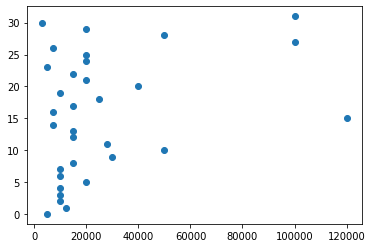

In [95]:
plt.scatter(salarios,x);

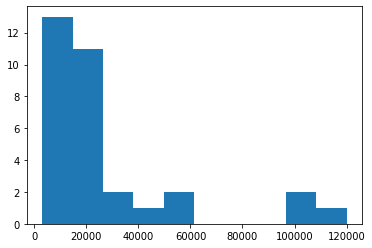

In [96]:
plt.hist(salarios);

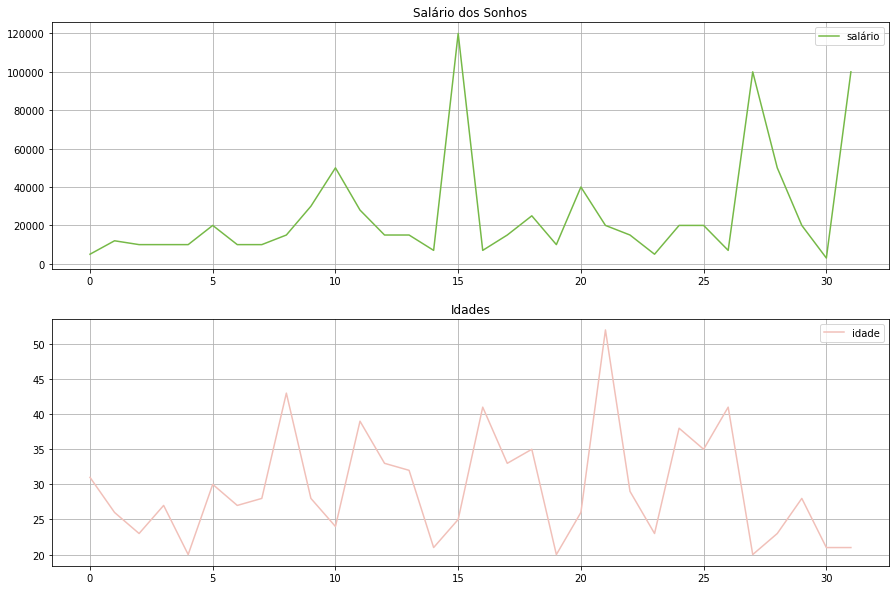

In [97]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(x,salarios, color='#76B947', label='salário');
plt.title('Salário dos Sonhos')
plt.grid(True)
# plt.box(False)
# plt.xticks([],[])
# plt.yticks([],[])
plt.legend();
plt.subplot(212)
plt.plot(x,idades, color='#F1C0B9', label='idade')
plt.title('Idades')
plt.grid(True)
# plt.box(False)
# plt.xticks([],[])
# plt.yticks([],[])
plt.legend();

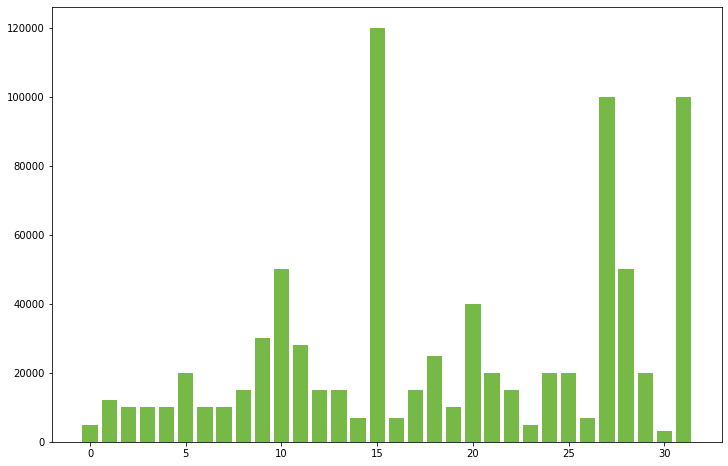

In [98]:
plt.figure(figsize=(12,8))
plt.bar(x,salarios, color='#76B947');

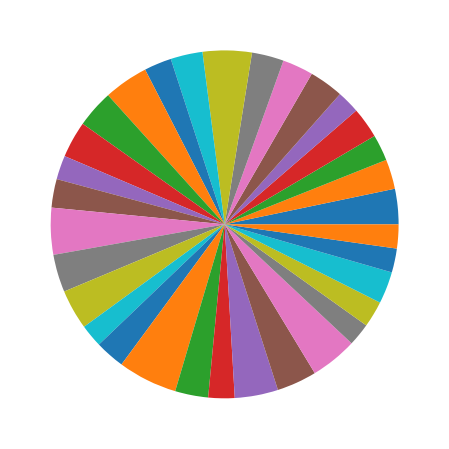

In [99]:
plt.figure(figsize=(12,8))
plt.pie(idades);

In [100]:
dados_generos = (alunos_afrodev[:,header == 'G'
                                            +u'Ãª'
                                            +'nero ']).ravel()

In [101]:
(generos,generos_counts) = np.unique(dados_generos, return_counts=True)

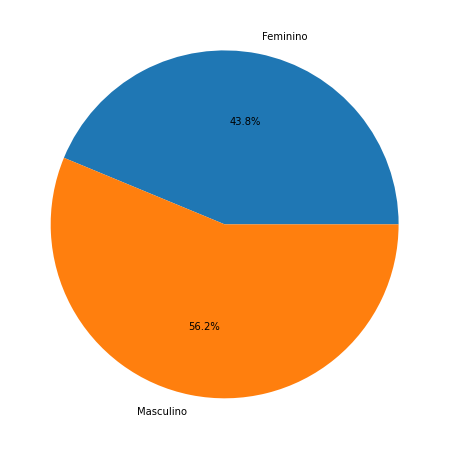

In [102]:
plt.figure(figsize=(12,8))
plt.pie(generos_counts,
        labels=generos, 
        autopct='%1.1f%%');

In [103]:
divisoes = math.ceil((salarios.size)**0.5)

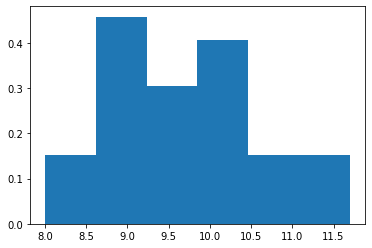

In [104]:
plt.hist(np.log(salarios), density=True, bins=divisoes);

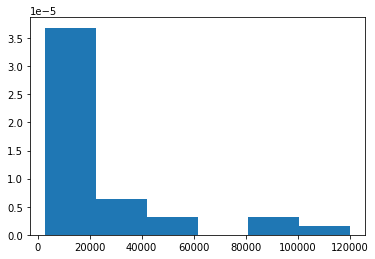

In [105]:
plt.hist(salarios, density=True, bins=divisoes);

In [106]:
atraente = alunos_afrodev[:,header == 'O qu'
                                      +u'Ã£'
                                      +'o atraente voc'
                                      +u'Ãª'
                                      +' se considera de 0 at'
                                      +u'Ã©'
                                      +' 10'].astype(np.uint8).ravel()

In [107]:
atraente

array([ 8, 10,  8,  6,  8,  8,  6,  8,  8,  9,  7,  8,  7,  7,  5,  5, 10,
        9,  8,  6, 10,  5,  8,  9,  5,  5, 10,  9,  8,  6,  7,  3],
      dtype=uint8)

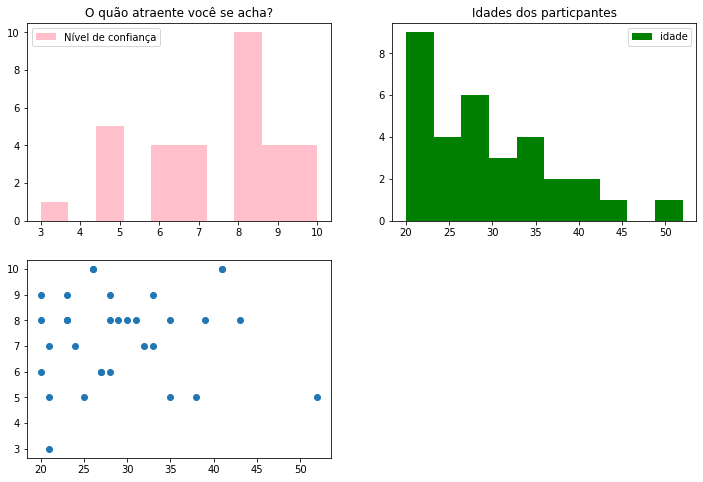

In [108]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.hist(atraente, color='pink', label='Nível de confiança');
ax2.hist(idades, color='green', label='idade');
ax3.scatter(idades, atraente);

ax1.set_title('O quão atraente você se acha?')
ax2.set_title('Idades dos particpantes')

ax1.legend();
ax2.legend();


In [109]:
np.cov(idades,atraente)

array([[61.86995968,  0.94758065],
       [ 0.94758065,  3.14516129]])

In [110]:
from scipy.stats import pearsonr

corr,_ = pearsonr(idades,atraente)

corr

0.06792893473639668